In [1]:
import numpy as np
import pickle
from visualization import *
from run_exp import *

In [2]:
!pip install pulp
!pip install joblib
import pulp

fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3)
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3, sample="full")
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [2]:
from datetime import date
today = date.today().strftime("%m%d%y")

run = 50
it = 50
a = 30
samp = "Z" # "B"
dnew = "r" # "w"
path = "output/exp_result/sampleZ_random/" + today + "_r" + str(run) + "_it" + str(it) + "_a" + str(a) + "/"

import os
if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
from joblib import Parallel, delayed
Parallel(n_jobs=3)(delayed(run_exp)(sample=samp, iter=it, file_name= path+str(i+1), draw=dnew, alpha=a) for i in range(run))

In [4]:
# load results
n = 50
path = "output/exp_result/sampleZ_random/031220_r50_it50_a15/031220_r50_it50_a15"

results = []
for i in range(1,n+1):
    results.append(pickle.load(open(path+str(i), 'rb')))

## plot - K v.s. loglike
compare the grows of log-likelihood with K (feature-counts) for 50 iterations.


0


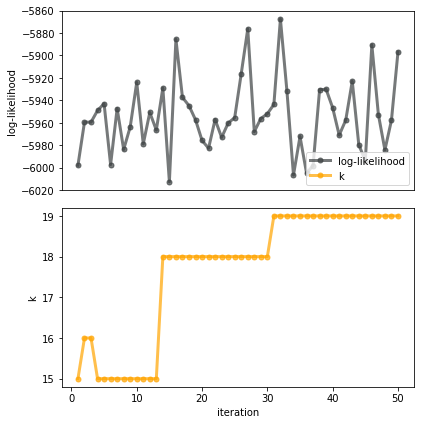

1


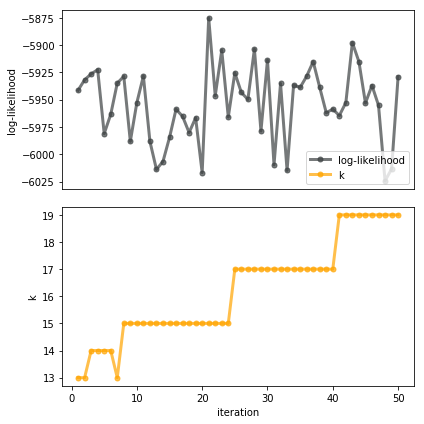

2


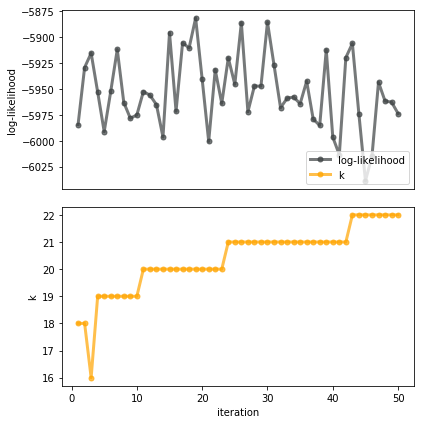

3


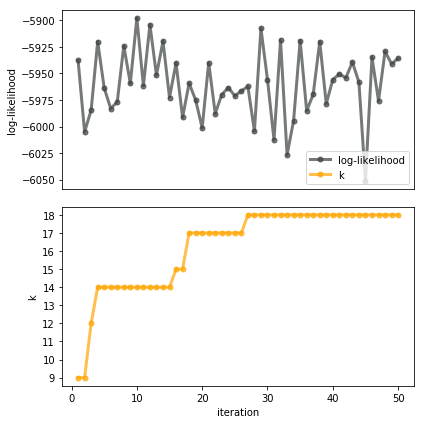

4


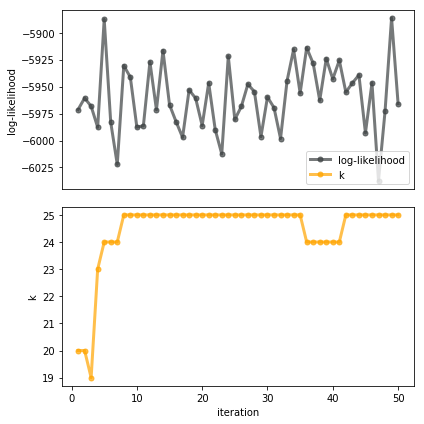

5


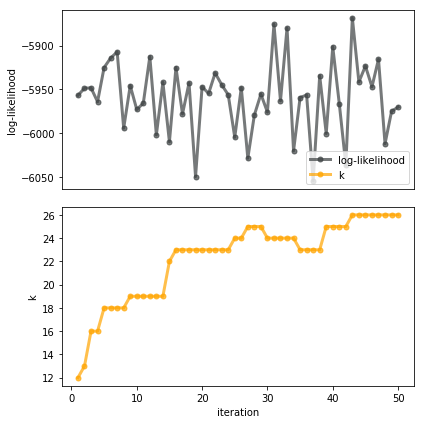

6


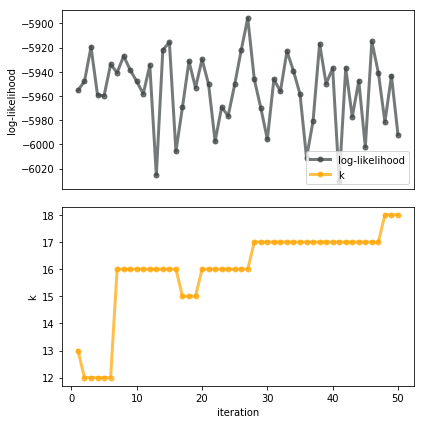

7


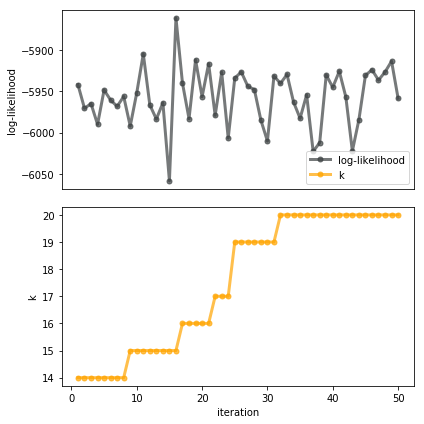

8


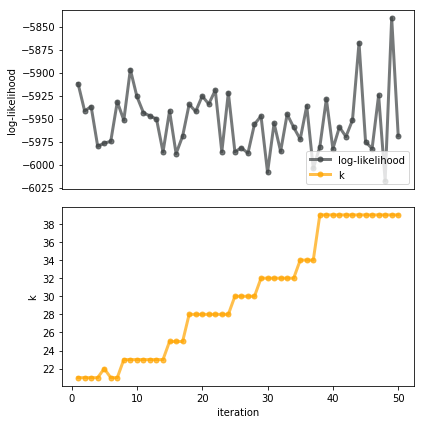

9


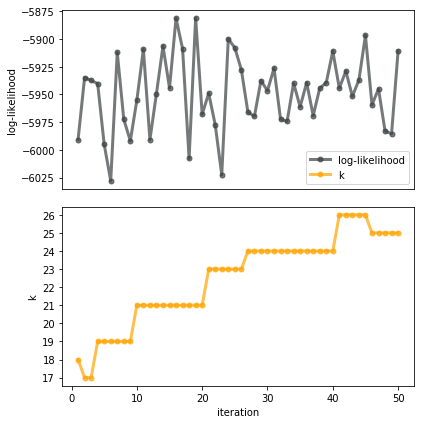

10


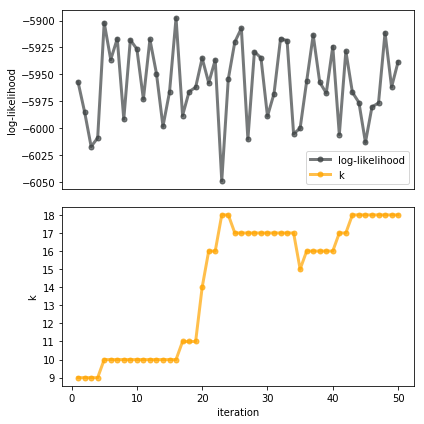

11


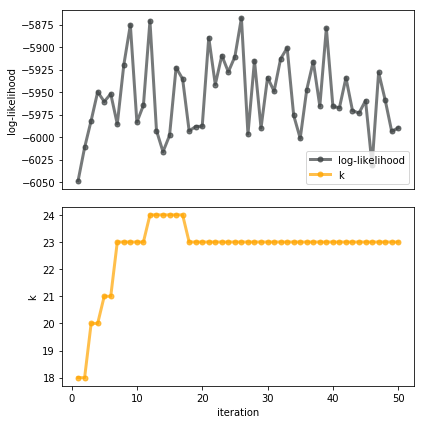

12


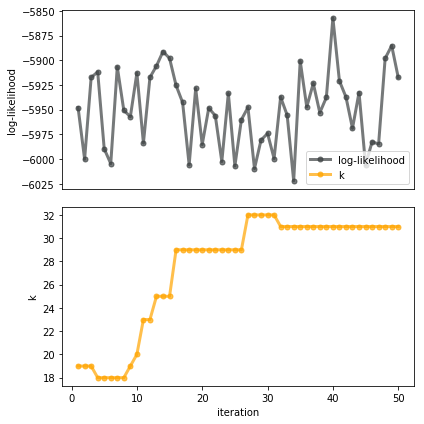

13


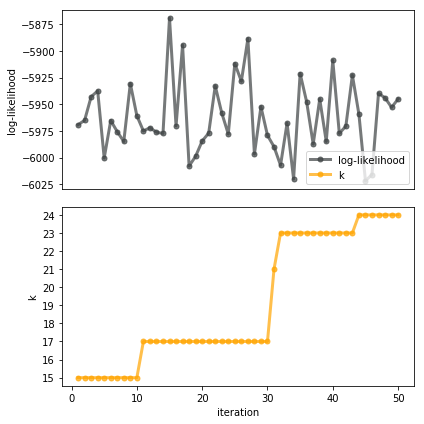

14


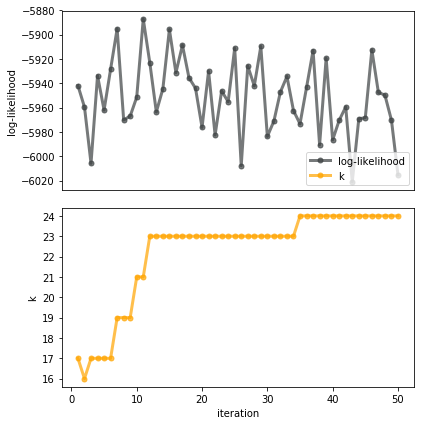

15


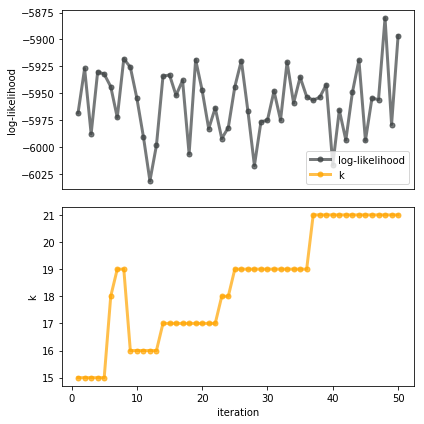

16


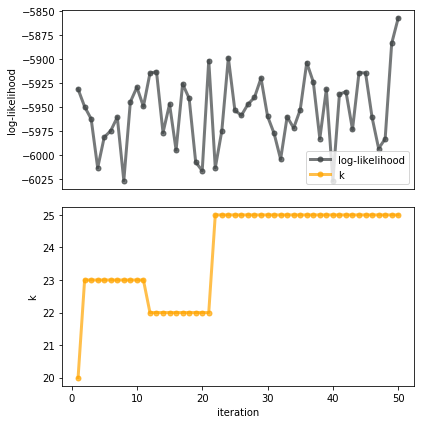

17


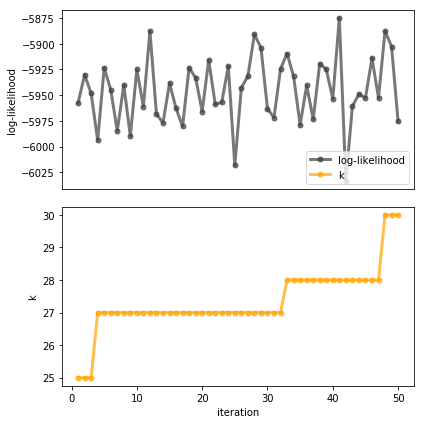

18


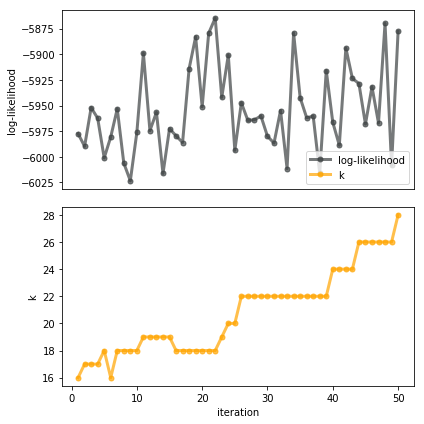

19


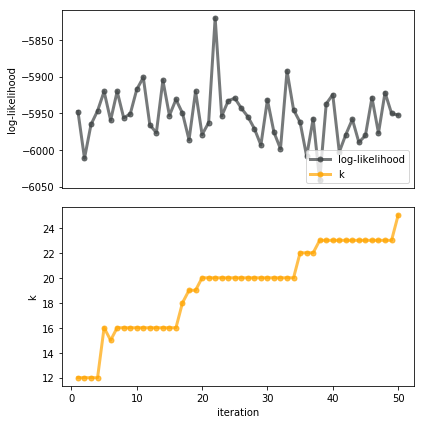

20


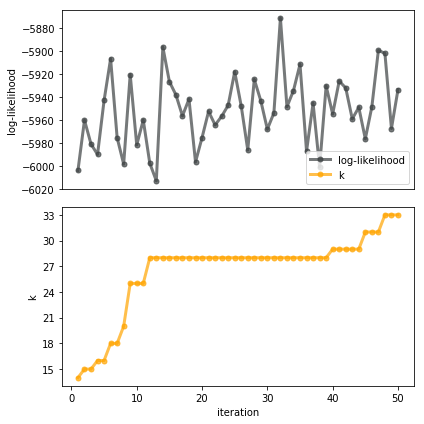

21


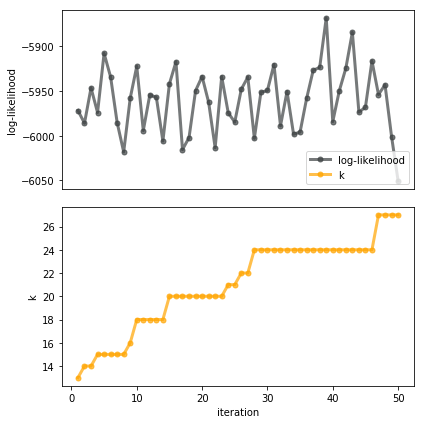

22


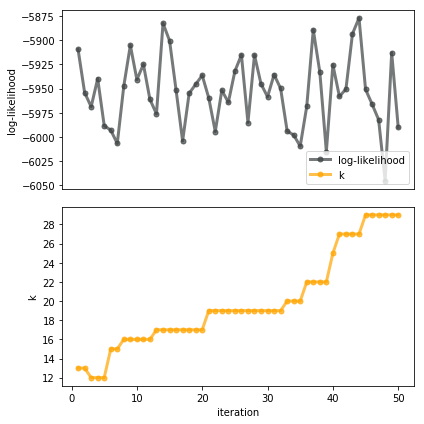

23


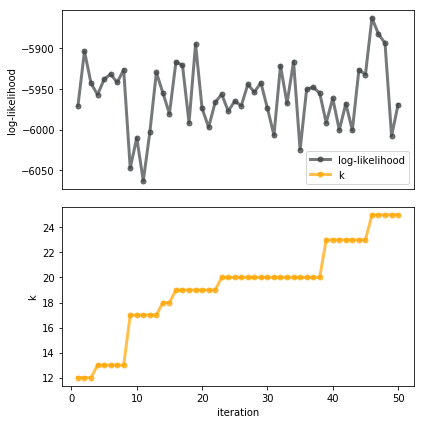

24


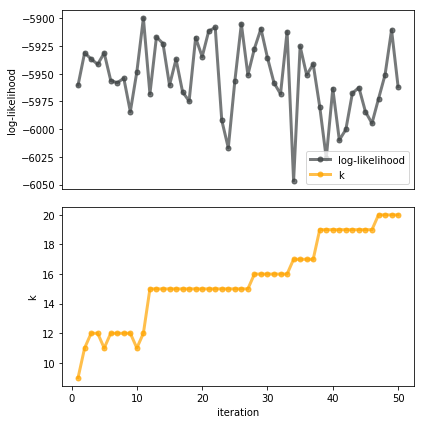

25


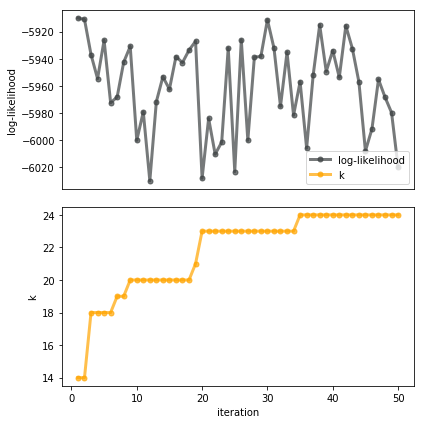

26


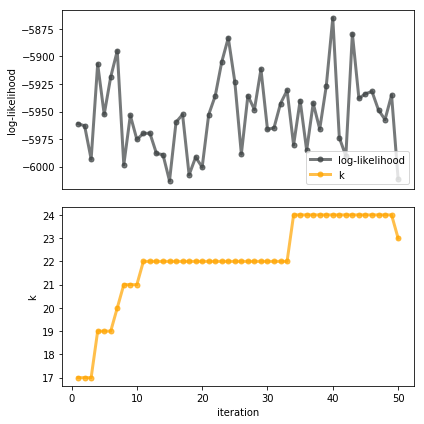

27


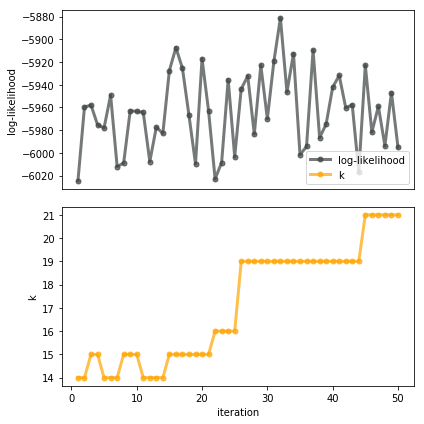

28


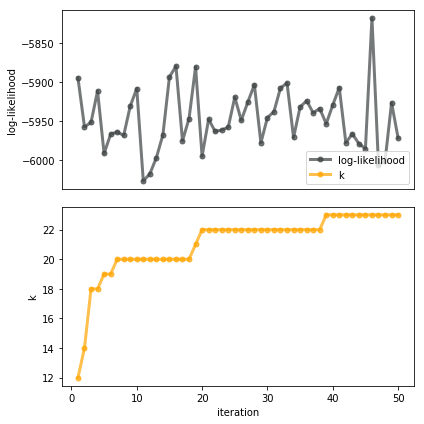

29


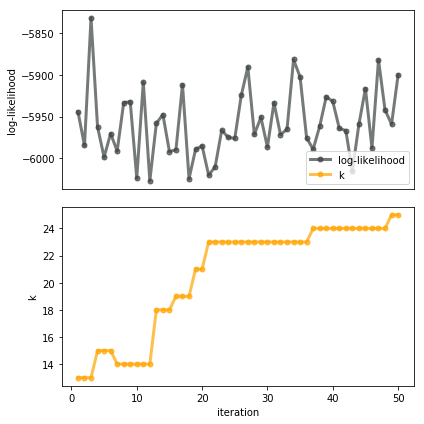

30


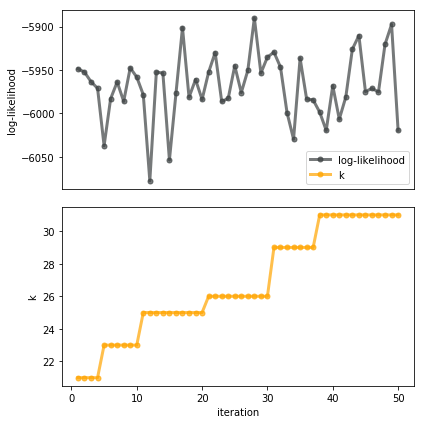

31


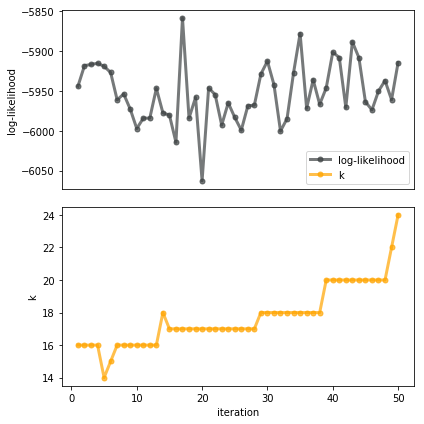

32


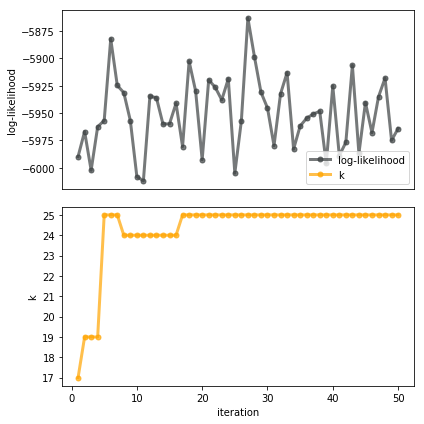

33


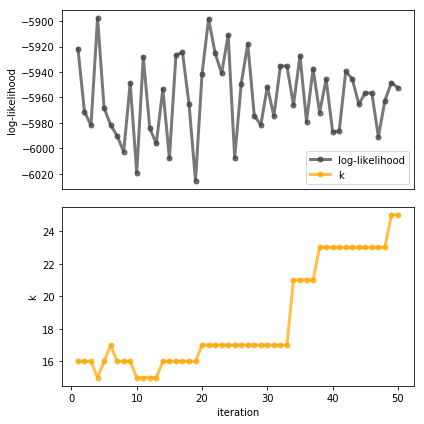

34


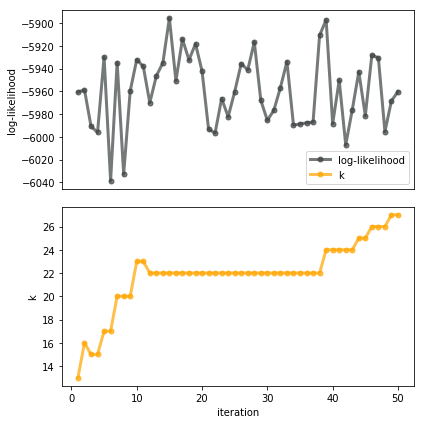

35


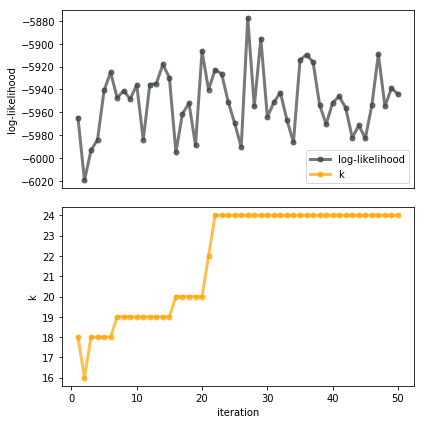

36


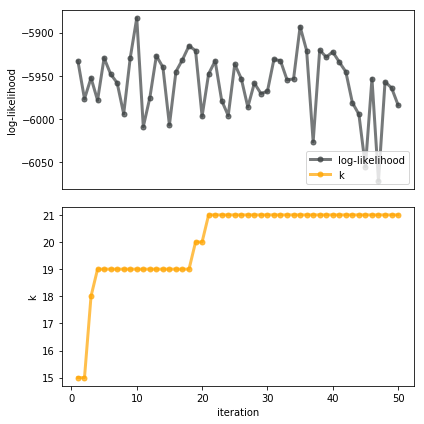

37


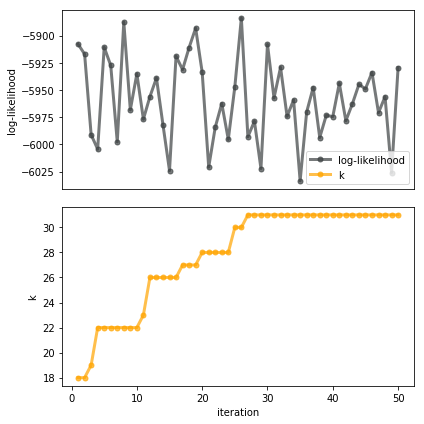

38


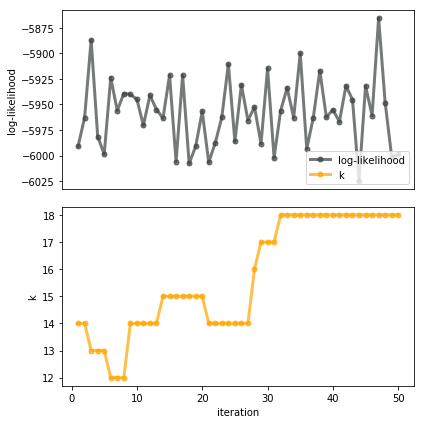

39


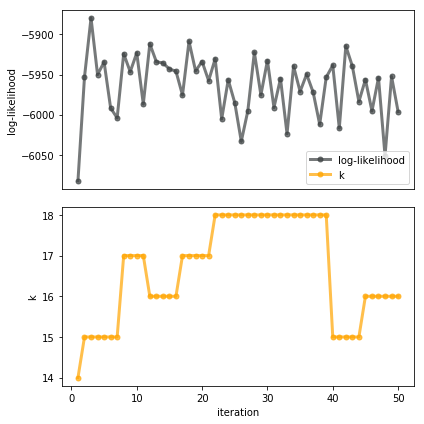

40


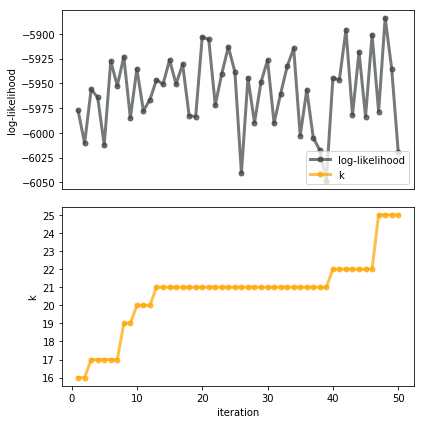

41


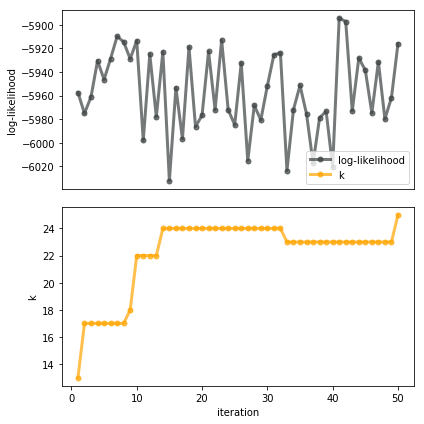

42


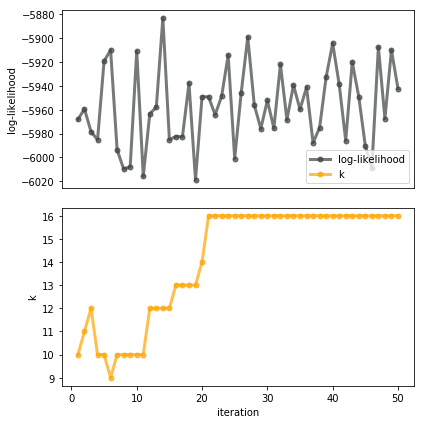

43


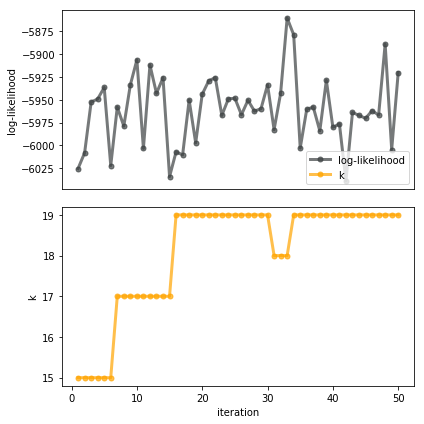

44


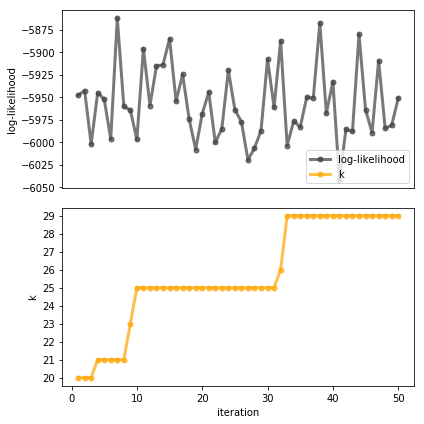

45


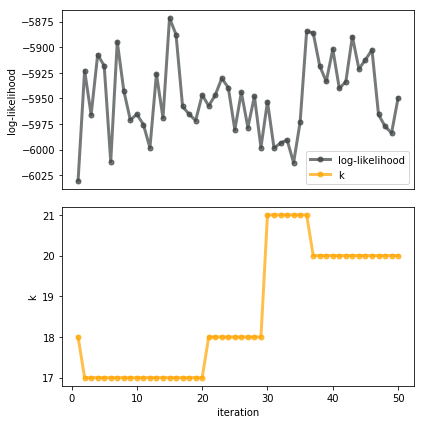

46


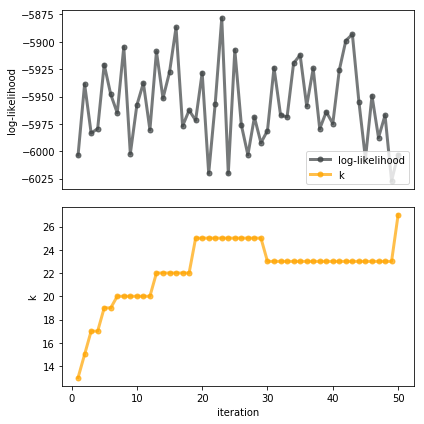

47


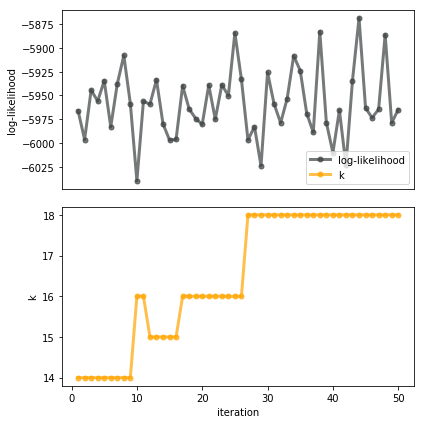

48


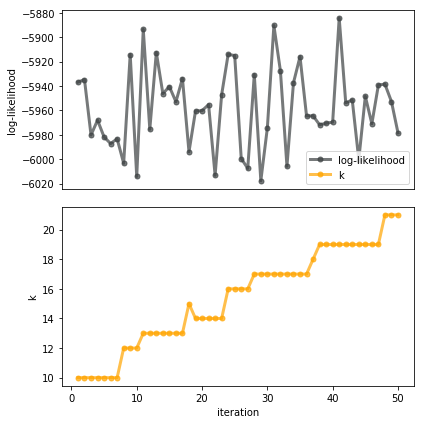

49


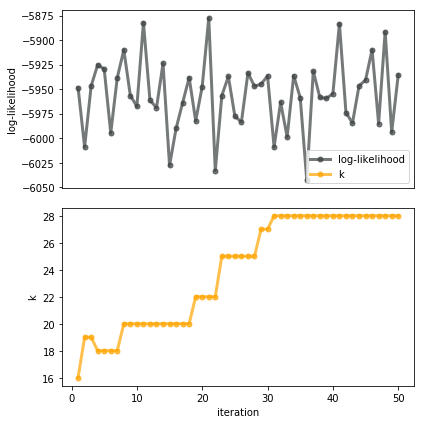

In [5]:
for i in range(n):
    print(i)
    plot_curve(results[i]['log_track'], results[i]['k_track'])

## Summarize in one plot

Take all previous results, and take the mean of all runs for each iteration.
Add std as error, to see how it differs.

In [18]:
log_all = [results[i]['log_track'] for i in range(it)]
k_all = [results[i]['k_track'] for i in range(it)]

log_mean = np.mean(log_all, axis=0)
k_mean = np.mean(k_all, axis=0)
log_std = np.std(log_all, axis=0)
k_std = np.std(k_all, axis=0)

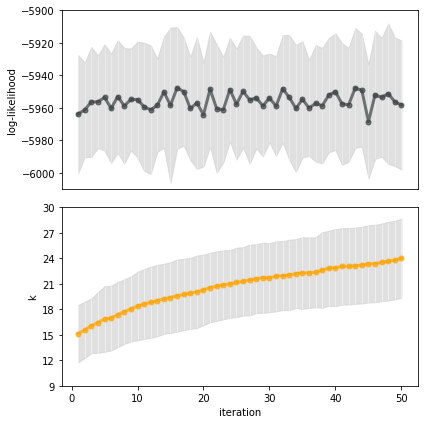

In [23]:
plot_curve(log_mean, k_mean, log_std, k_std, saveFile=True, fileName="plot-Zrand", c1_lh=[-6010,-5900], c2_lh=[9,30])

## plot log-likelihood v.s. accuracy

compare the grows of log-likelihood with accuracy for 50 iterations.

In [20]:
# loglike V.S. accuracy
log_all = [results[i]['log_track'] for i in range(n)]
acc_all = [[results[j]['accuracies'][i][0] for i in range(it)] for j in range(n)]

log_mean = np.mean(log_all, axis=0)
acc_mean = np.mean(acc_all, axis=0)
log_std = np.std(log_all, axis=0)
acc_std = np.std(acc_all, axis=0)

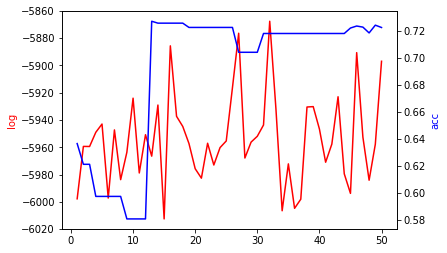

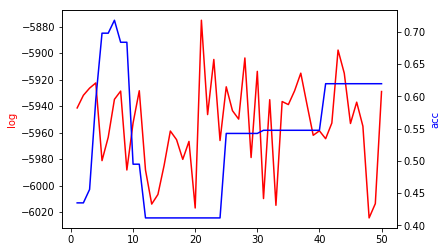

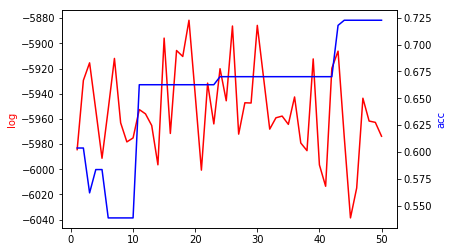

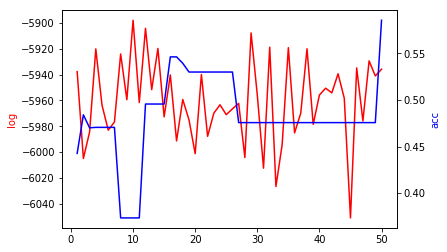

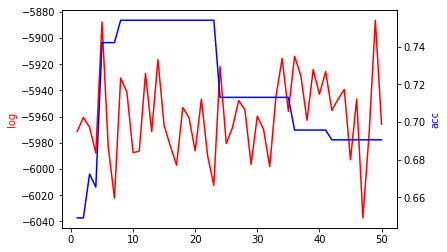

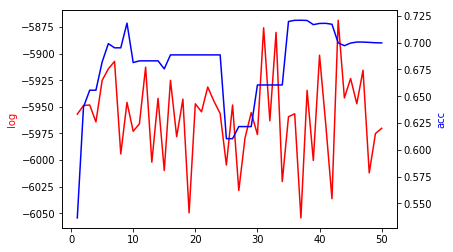

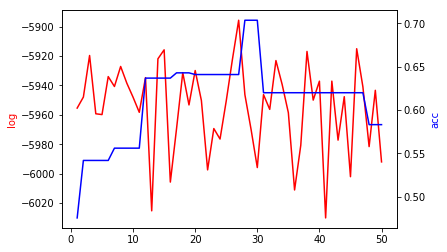

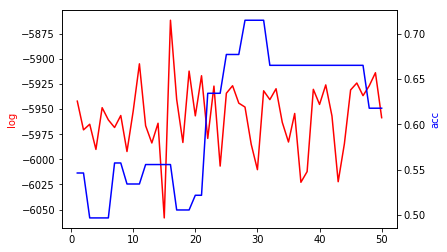

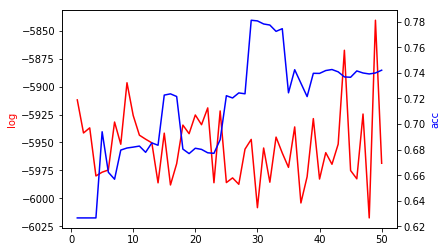

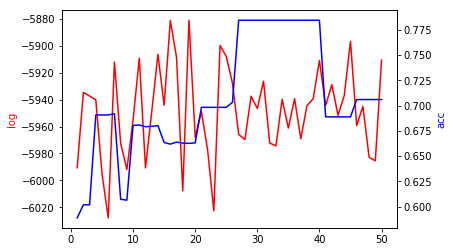

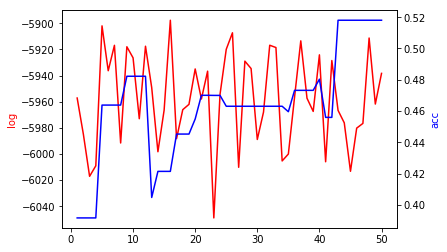

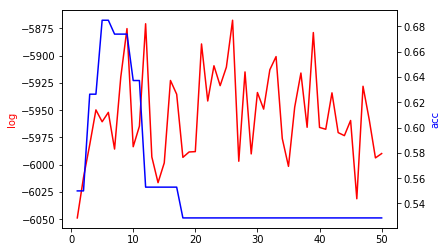

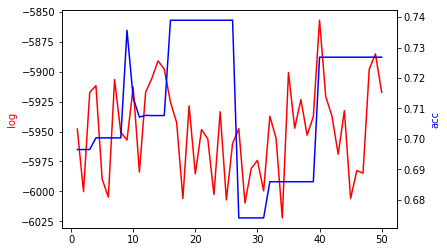

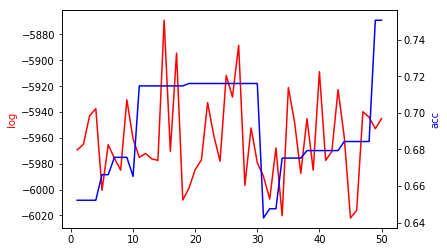

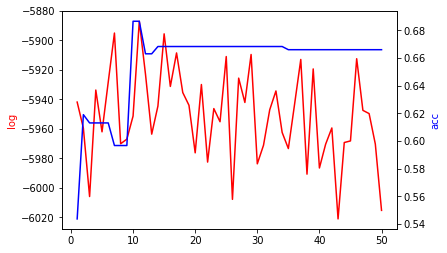

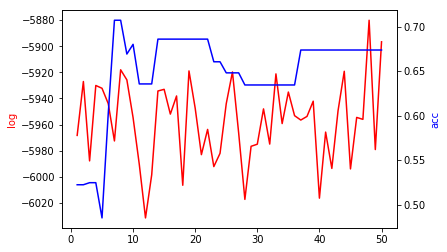

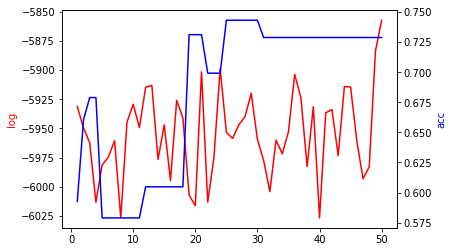

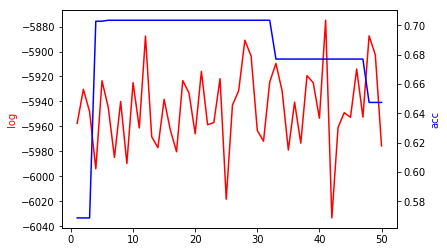

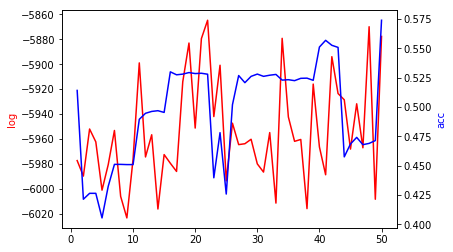

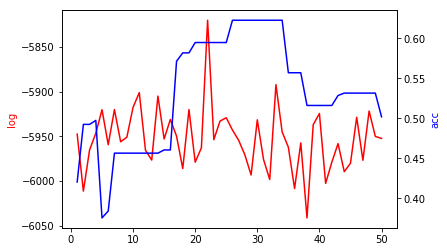

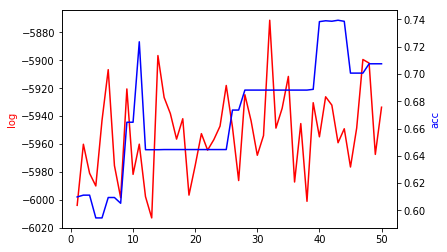

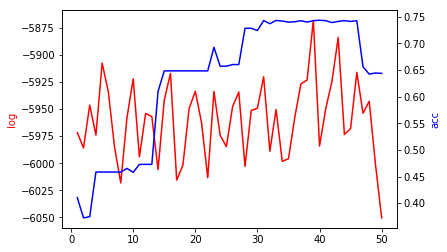

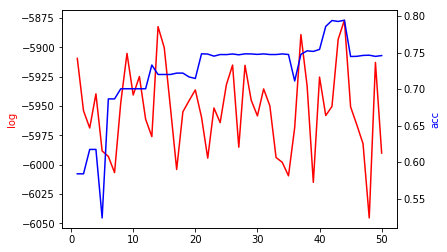

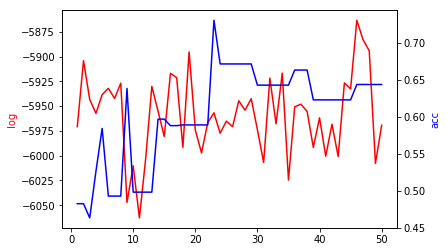

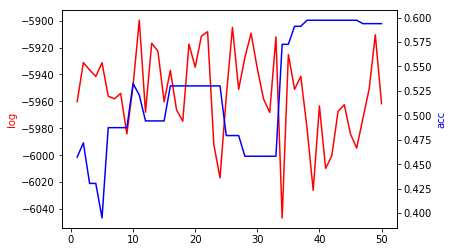

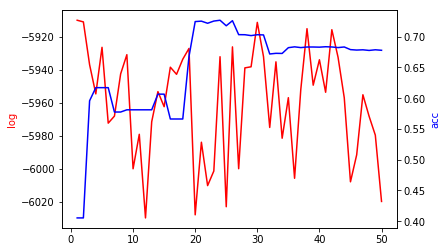

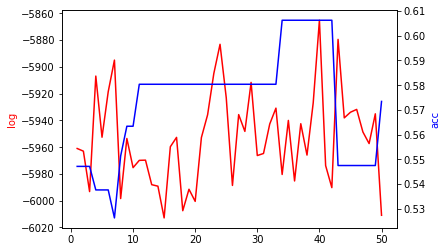

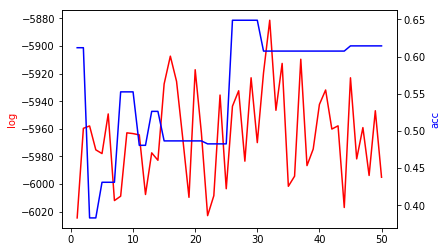

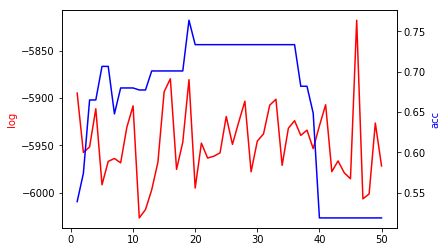

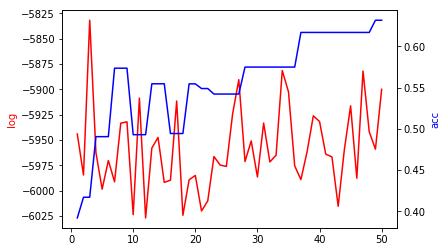

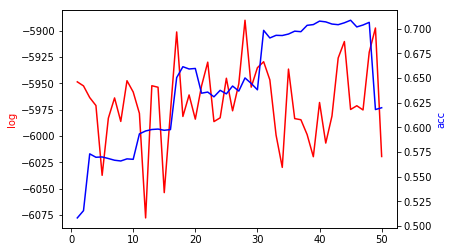

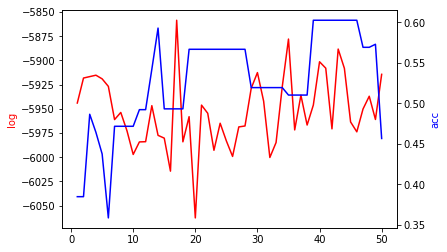

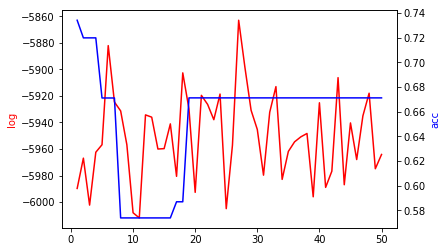

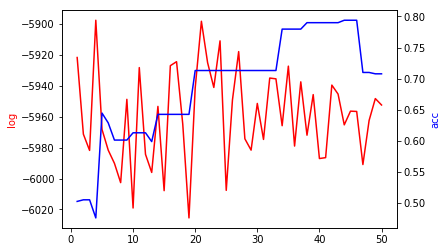

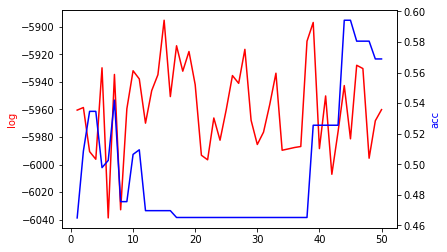

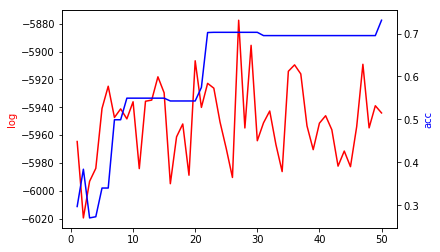

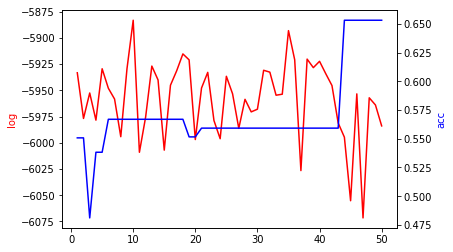

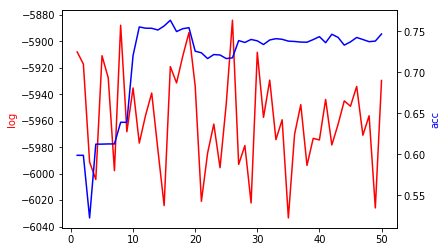

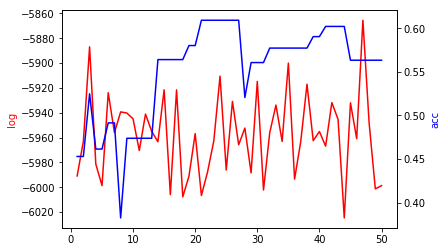

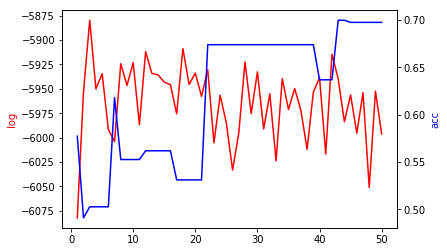

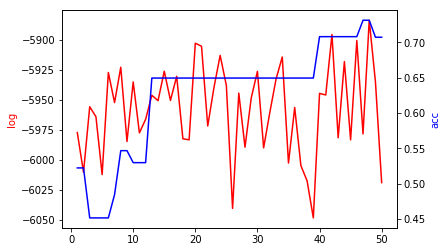

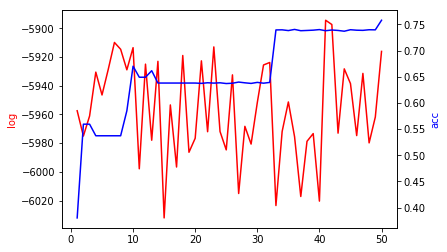

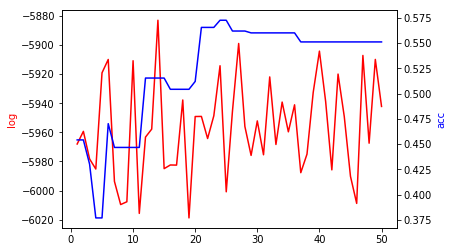

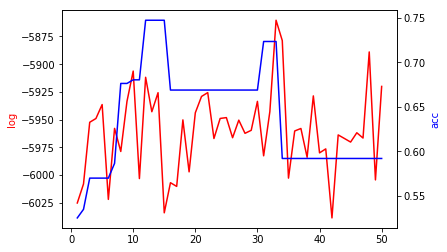

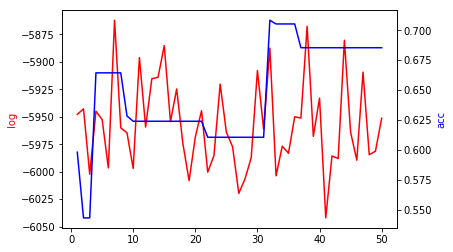

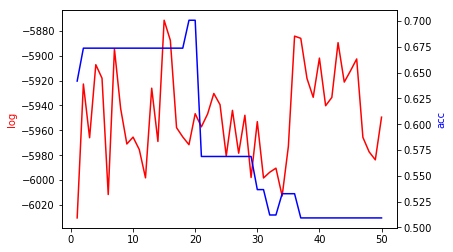

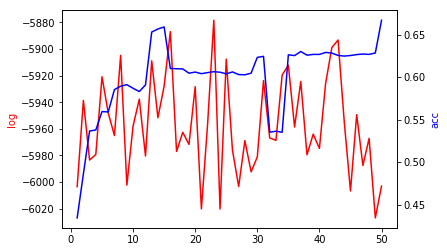

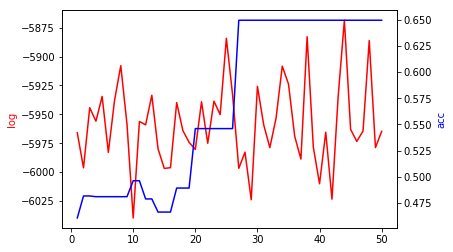

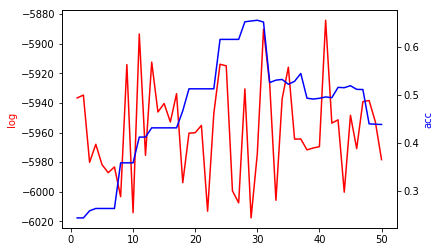

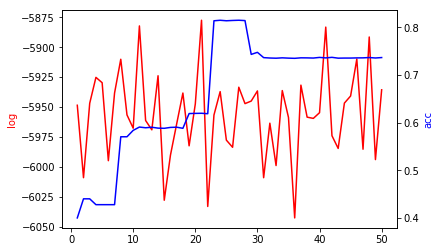

In [9]:
for i in range(n):
    index = [i for i in range(1,51)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(index, log_all[i], 'r-')
    ax1.set_ylabel('log', color='r')
    ax1.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(index, acc_all[i], 'b-')
    ax2.set_ylabel('acc', color='b')
    ax2.grid(False)

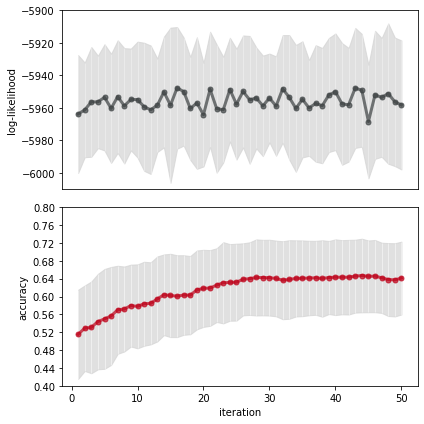

In [24]:
plot_curve2(log_mean, acc_mean, log_std, acc_std, saveFile=True, fileName="plot-Zrand_acc", c1_lh=[-6010,-5900], c2_lh=[0.4,0.8])

In [17]:
print([results[i]['best_model']['best_iter'] for i in range(n)])
[results[i]['best_model']['best_accuracies'] for i in range(n)]

[13, 6, 43, 49, 7, 35, 27, 27, 28, 26, 42, 4, 15, 48, 9, 6, 24, 5, 49, 25, 42, 32, 41, 22, 35, 23, 33, 25, 18, 48, 44, 38, 0, 43, 43, 49, 43, 15, 20, 42, 46, 49, 23, 11, 31, 18, 49, 26, 29, 23]


[(0.72565, 0.7327),
 (0.7179666666666666, 0.7242),
 (0.7226666666666667, 0.7272),
 (0.5854833333333334, 0.5833),
 (0.754, 0.7575),
 (0.72085, 0.7195),
 (0.7034, 0.692),
 (0.7148833333333333, 0.7087),
 (0.7810666666666667, 0.7767),
 (0.7844833333333333, 0.8005),
 (0.5180333333333333, 0.5117),
 (0.6848833333333333, 0.6841),
 (0.7389666666666667, 0.733),
 (0.7505833333333334, 0.7551),
 (0.6864666666666667, 0.6778),
 (0.70715, 0.7111),
 (0.7431166666666666, 0.7405),
 (0.70355, 0.6972),
 (0.5739, 0.5702),
 (0.6223833333333333, 0.6183),
 (0.7393333333333333, 0.7364),
 (0.7431166666666666, 0.7524),
 (0.7939, 0.7978),
 (0.7302666666666666, 0.7324),
 (0.5910833333333333, 0.5979),
 (0.7268166666666667, 0.7323),
 (0.6062666666666666, 0.6171),
 (0.6488166666666667, 0.645),
 (0.7637333333333334, 0.7573),
 (0.6317333333333334, 0.6241),
 (0.70875, 0.7159),
 (0.6024666666666667, 0.6014),
 (0.7340333333333333, 0.7306),
 (0.79395, 0.794),
 (0.5942333333333333, 0.5912),
 (0.7310166666666666, 0.7295),
 (0

In [7]:
all_best = [results[i]['best_model']['best_accuracies'][0] for i in range(n)]
all_iter = [results[i]['best_model']['best_iter'] for i in range(n)]
all_k = [results[i]['best_model']['best_k'] for i in range(n)]
best = np.argmax(all_best)
best_result = results[best]['best_model']
best_it = best_result['best_iter']
best_acc = best_result['best_accuracies'][0]
best_features = best_result['best_features']
best_k = best_result['best_k']


In [8]:
print("The best result is in run {}, iteration {}, with accuracy {} (K = {})".format(best, best_it, best_acc, best_k))
print("avg acc: {}".format(np.mean(all_best)))
print("avg iter: {}".format(np.mean(all_iter)))
print("avg k: {}".format(np.mean(all_k)))

The best result is in run 49, iteration 23, with accuracy 0.8150833333333334 (K = 25)
avg acc: 0.6961833333333333
avg iter: 28.98


## plot best features

[2, 1, 2, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


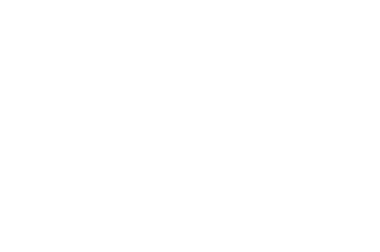

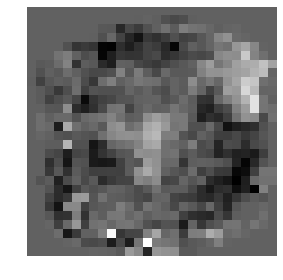

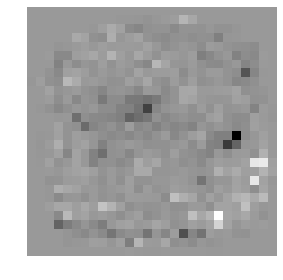

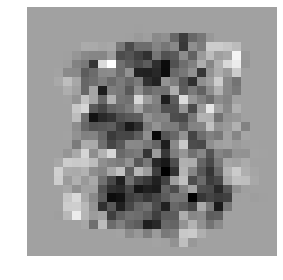

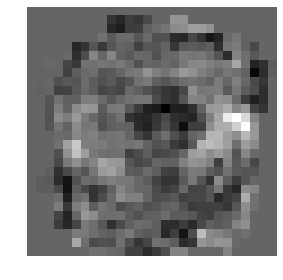

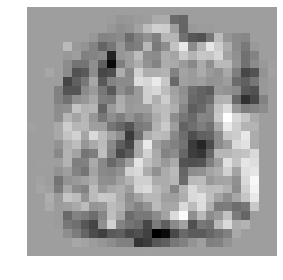

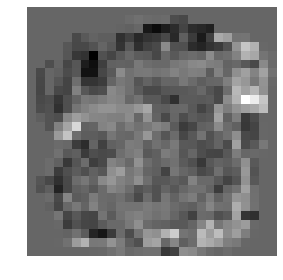

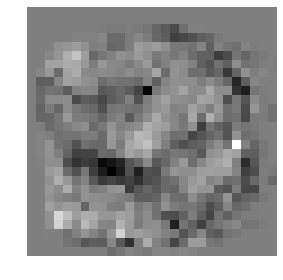

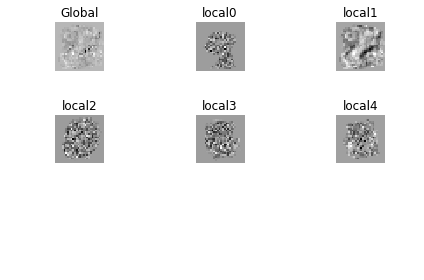

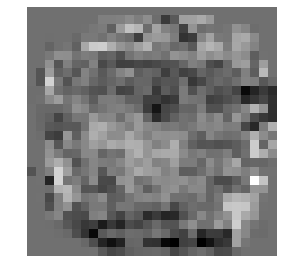

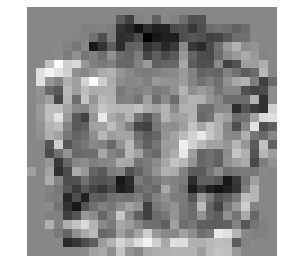

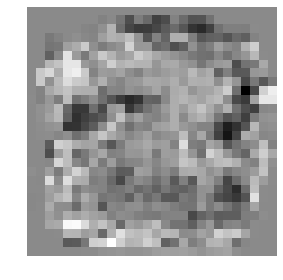

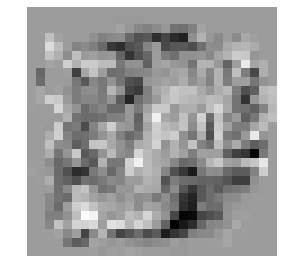

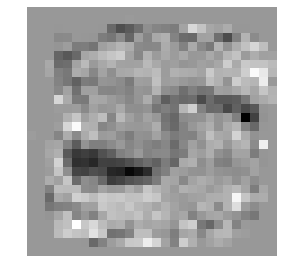

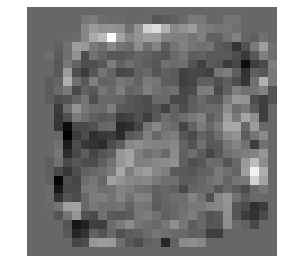

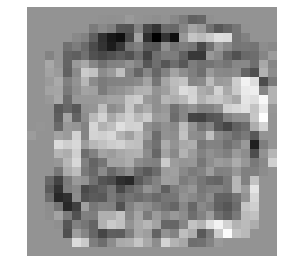

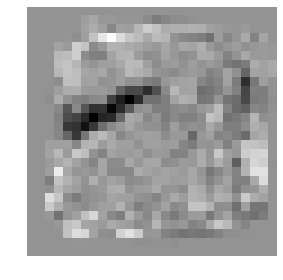

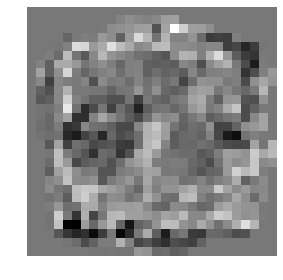

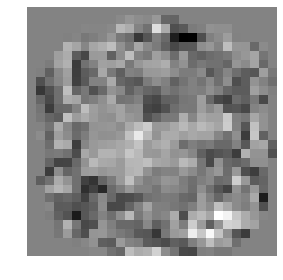

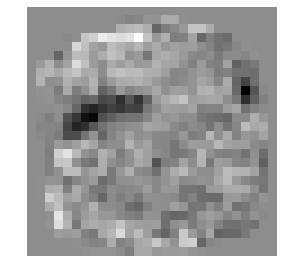

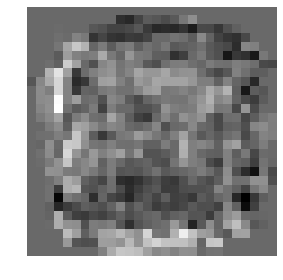

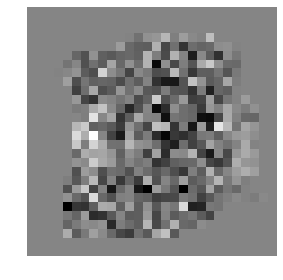

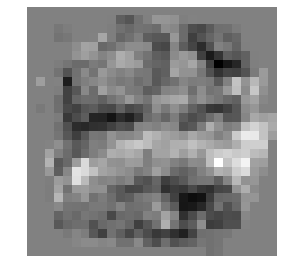

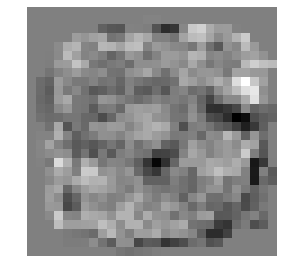

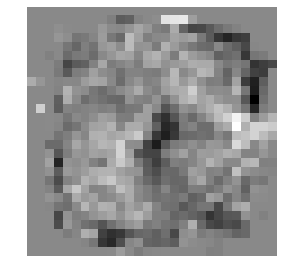

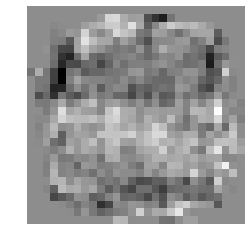

In [16]:
print(best_result['best_dist'])
prep_features = prep_group(best_features)
plot_all(prep_features)